# Módulo 5 Actividad 5

### Intención del aprendizaje esperado:


5. Elabora un modelo predictivo aplicando el algoritmo K-NN para resolver un problema de clasificación utilizando lenguaje Python.


### Ejercicios Planteados


**El objetivo del ejercicio actual es utilizar medidas físicas para predecir la edad del abulón, usando el algoritmo K-NN**


*Datos:*

In [52]:
import pandas as pd
url = (
 "https://archive.ics.uci.edu/ml/machine-learning-databases"
 "/abalone/abalone.data"
)
abalone = pd.read_csv(url, header=None)
abalone.columns = [
 "Sex",
 "Length",
 "Diameter",
 "Height",
 "Whole weight",
 "Shucked weight",
 "Viscera weight",
 "Shell weight",
 "Rings",
]
abalone.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


1. Lo primero que debe hacer es eliminar la variable “Sex”.

In [53]:

df_abalone = pd.DataFrame(abalone)
df_abalone = df_abalone.drop('Sex', axis=1)
df_abalone.head()



,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


2. Realice estadística descriptiva para el conjunto de datos entregados.

In [54]:
df_abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


3. La variable objetivo es “Rings”, por lo que muestre la distribución de estos datos e interprete.

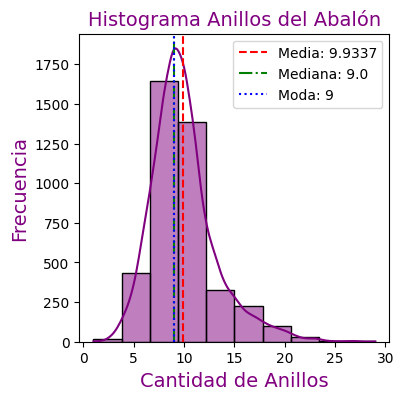

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

media_anillos = np.mean(df_abalone['Rings'])
mediana_anillos = np.median(df_abalone['Rings'])
des_std_anillos = np.std(df_abalone['Rings'])
moda_anillos = df_abalone['Rings'].mode()[0]

figure =  plt.figure(figsize=(4, 4))

sns.histplot(data = df_abalone, x= 'Rings', bins=10, color='purple', kde=True)

plt.axvline(media_anillos , color='red', linestyle='--', label = f'Media: {media_anillos:.4f}')
plt.axvline(mediana_anillos , color='green', linestyle='-.', label = f'Mediana: {mediana_anillos}')
plt.axvline(moda_anillos, color='blue', linestyle=':', label = f'Moda: {moda_anillos}')

plt.title('Histograma Anillos del Abalón', fontsize=14, color='purple')
plt.xlabel('Cantidad de Anillos', fontsize=14, color='purple')
plt.ylabel('Frecuencia', fontsize=14, color='purple')

plt.legend()
plt.show()

Al graficar la distribución de los datos relacionados con la cantidad de anillos del 'abalone' podemos observar un comportamiento de distribución Normal.  En cuanto a sus medidas de tendencia central, al moda (valor que más veces se repite entre todos los valores) es el mismo valor de la mediana (valor que se encuentra en la mitad de la distribución luego de que los datos son ordenados numéricamente), en adición su media

In [60]:
moda_anillos

0    9
Name: Rings, dtype: int64